# AccelerateAI: Logistic Regression

## Multinomial Logistic Regression - Maritime Zone analysis

In [1]:
import pandas as pd 
import numpy as np

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./MaritimeZone.csv")

df.sample(5)

,VesselCount,MT_Zone
5,22,Zone2
9,45,Zone3
7,35,Zone3
4,18,Zone2
1,7,Zone1


In [3]:
df.dtypes

VesselCount     int64
MT_Zone        object
dtype: object

In [4]:
df["MT_Zone"] = df["MT_Zone"].astype("category")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[["VesselCount"]],df[["MT_Zone"]],test_size=0.5)

In [6]:
model_LogReg = LogisticRegression()

model_LogReg.fit(X_train,y_train)

LogisticRegression()

In [7]:
y_predictions = model_LogReg.predict(X_test)

y_predictions

array(['Zone2', 'Zone2', 'Zone2', 'Zone1', 'Zone2'], dtype=object)

In [8]:
# Actual
y_test

,MT_Zone
3,Zone1
8,Zone3
9,Zone3
2,Zone1
7,Zone3


In [9]:
model_LogReg.score(X_test,y_test)

0.2

In [10]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_predictions)

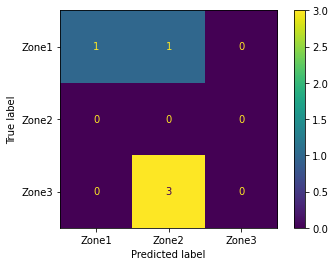

In [11]:
plot_confusion_matrix(model_LogReg,X_test,y_test)

plt.show()

### Analysis using MultiNomial Logit Model

In [12]:
mlogit_mod = sm.MNLogit(y_train, X_train)
mlogit_res = mlogit_mod.fit()

         Current function value: 0.480359
         Iterations: 35


In [13]:
print(mlogit_res.summary())

                          MNLogit Regression Results                          
Dep. Variable:                MT_Zone   No. Observations:                    5
Model:                        MNLogit   Df Residuals:                        3
Method:                           MLE   Df Model:                            0
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                  0.2863
Time:                        19:30:45   Log-Likelihood:                -2.4018
converged:                      False   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                       nan
MT_Zone=Zone2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
VesselCount       0.0919      0.078      1.172      0.241      -0.062       0.245
---------------------------------------------------------------------------------
MT_Zone=Zone3       coef    std err     